In [1]:
%matplotlib inline

# useful packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import time
import pandas as pd

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit.quantum_info import Statevector
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit

In [2]:
# Cobyla(maxiter = 400)
seeds = np.linspace(201, 10000, 10000 - 200)
Energy = []
iterations = []
execution_time = []

In [3]:
for i in np.arange(1, 11):
    df = pd.read_excel('static seeds ' + str(i) + '.xlsx')
    Energy += df['energy'].tolist()
    iterations += df['terminate iterations'].tolist()
    execution_time += df['time (s)'].tolist()

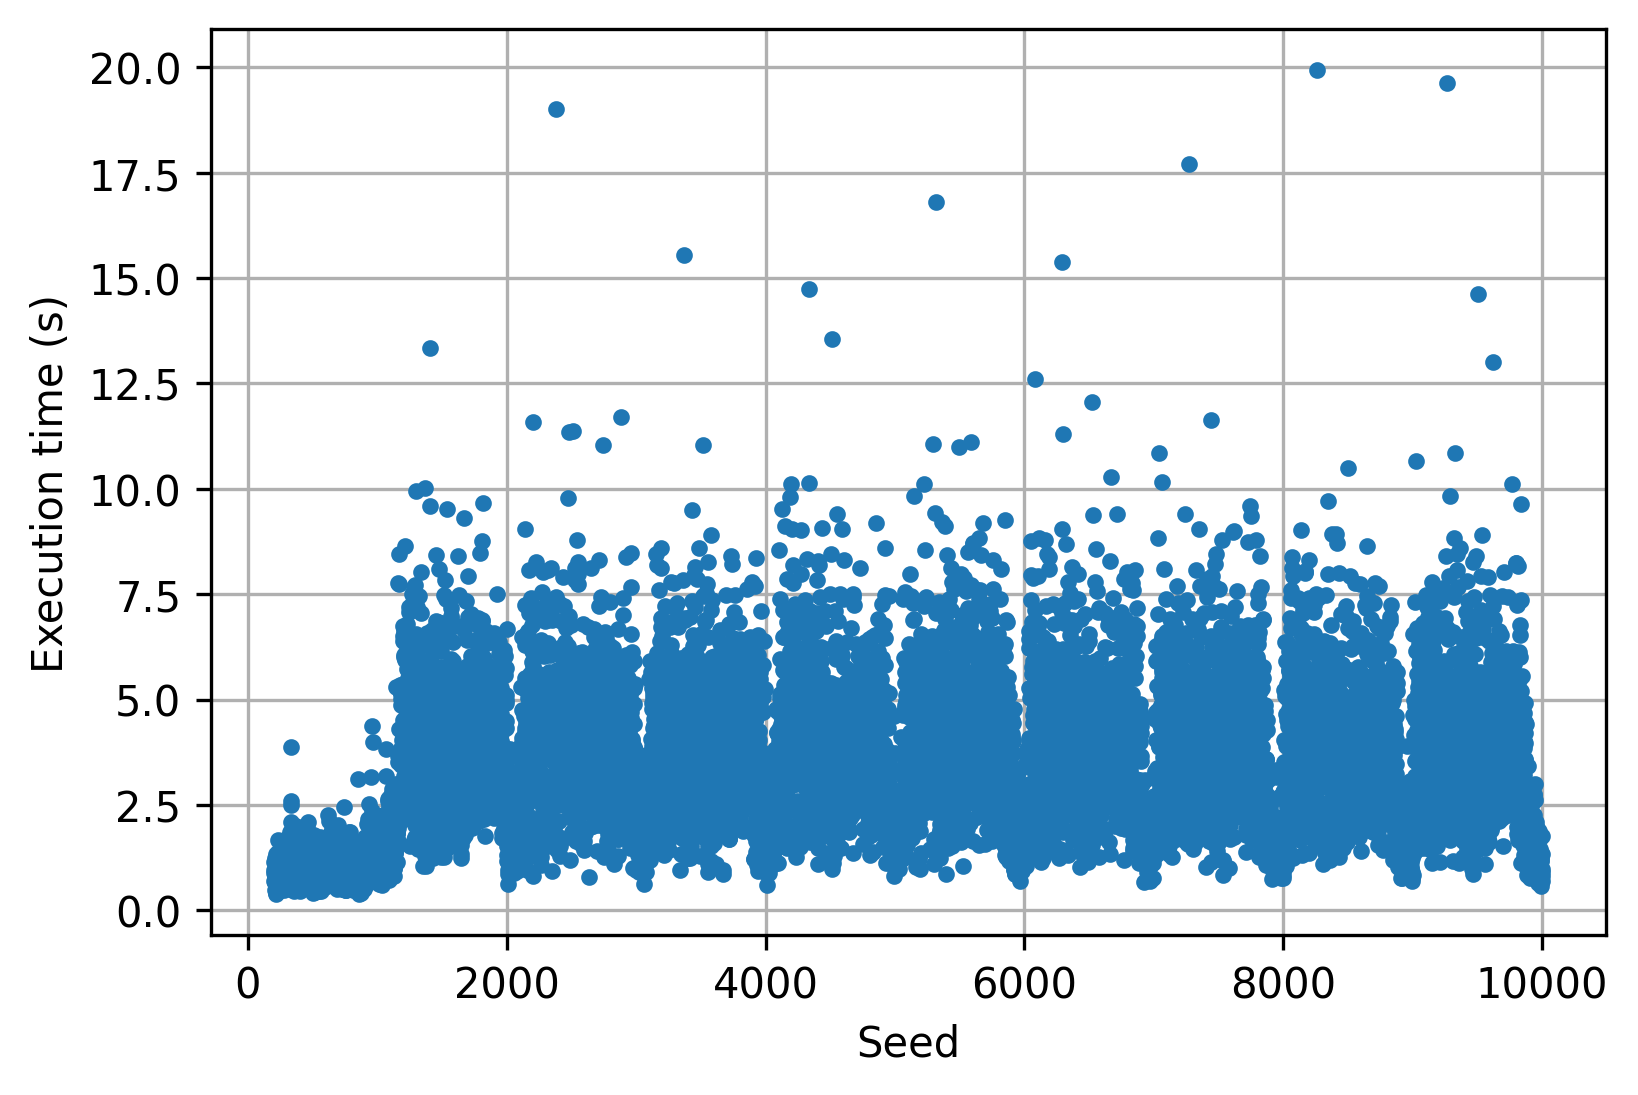

In [4]:
# seed v.s. execution time
plt.figure(dpi = 300)
plt.plot(seeds, execution_time, '.')
plt.xlabel('Seed')
plt.ylabel('Execution time (s)')
plt.grid()
plt.show()

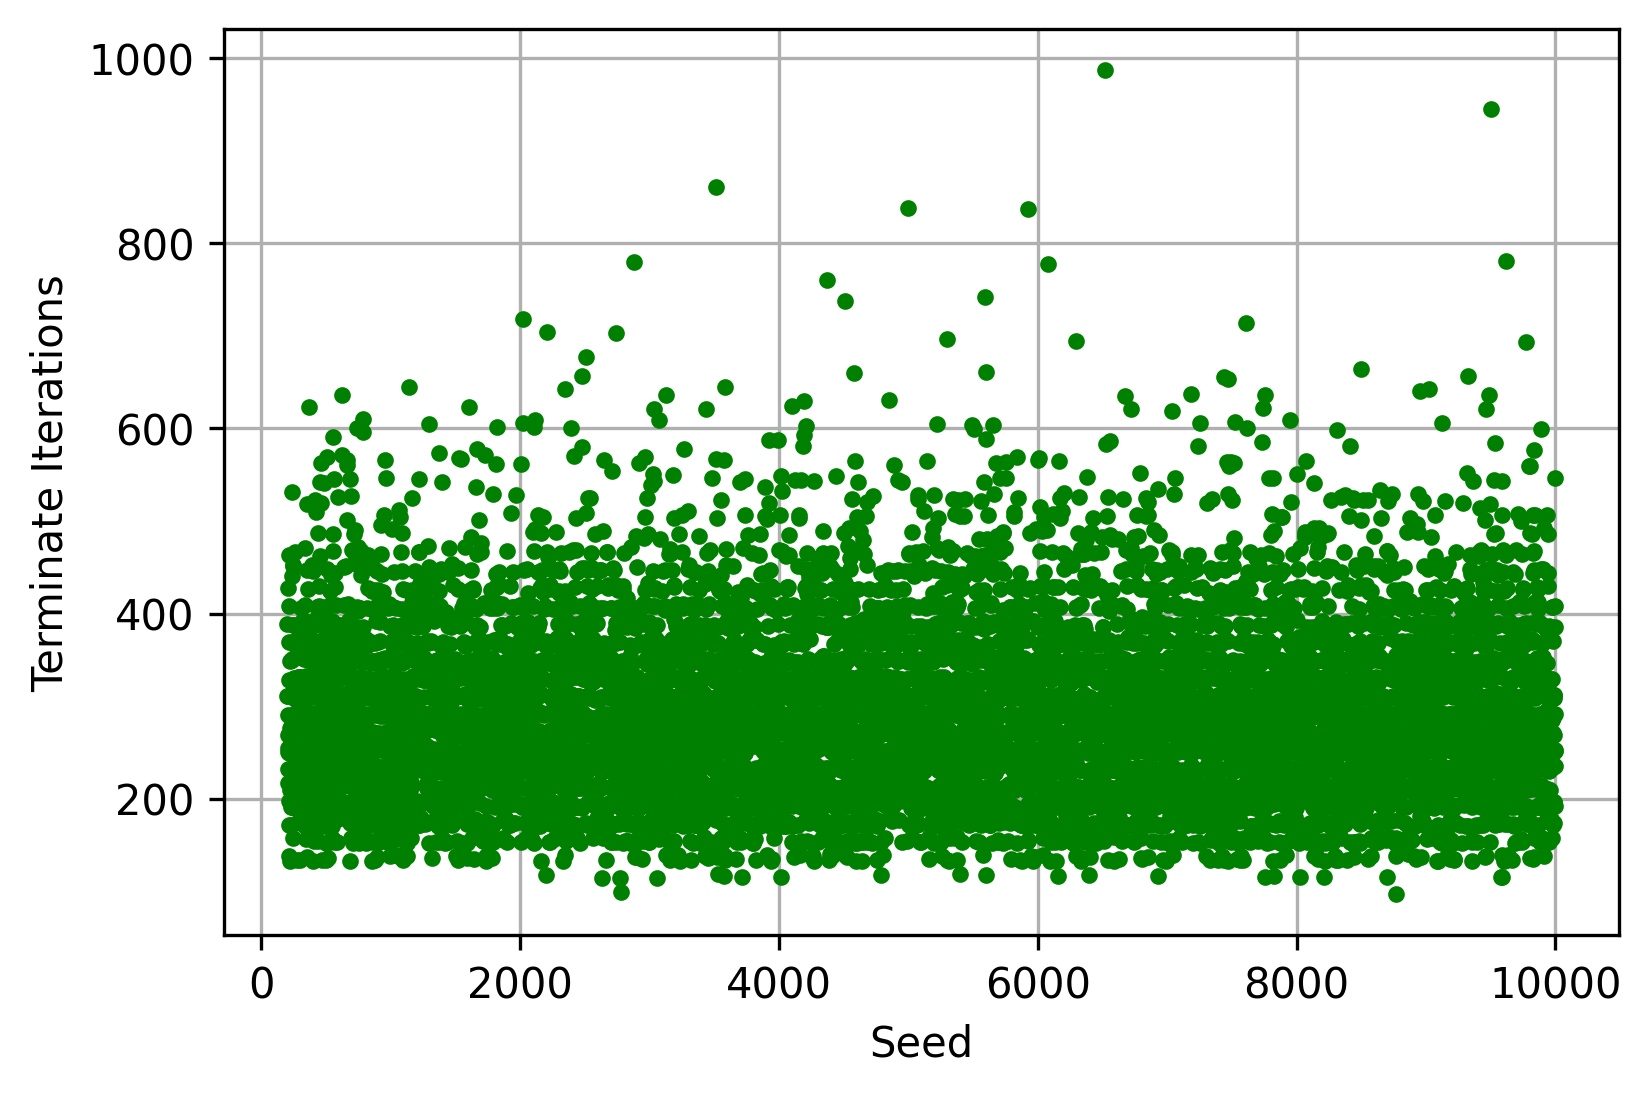

In [5]:
# seed v.s. iterations
plt.figure(dpi = 300)
plt.plot(seeds, iterations, 'g.')
plt.xlabel('Seed')
plt.ylabel('Terminate Iterations')
plt.grid()
plt.show()

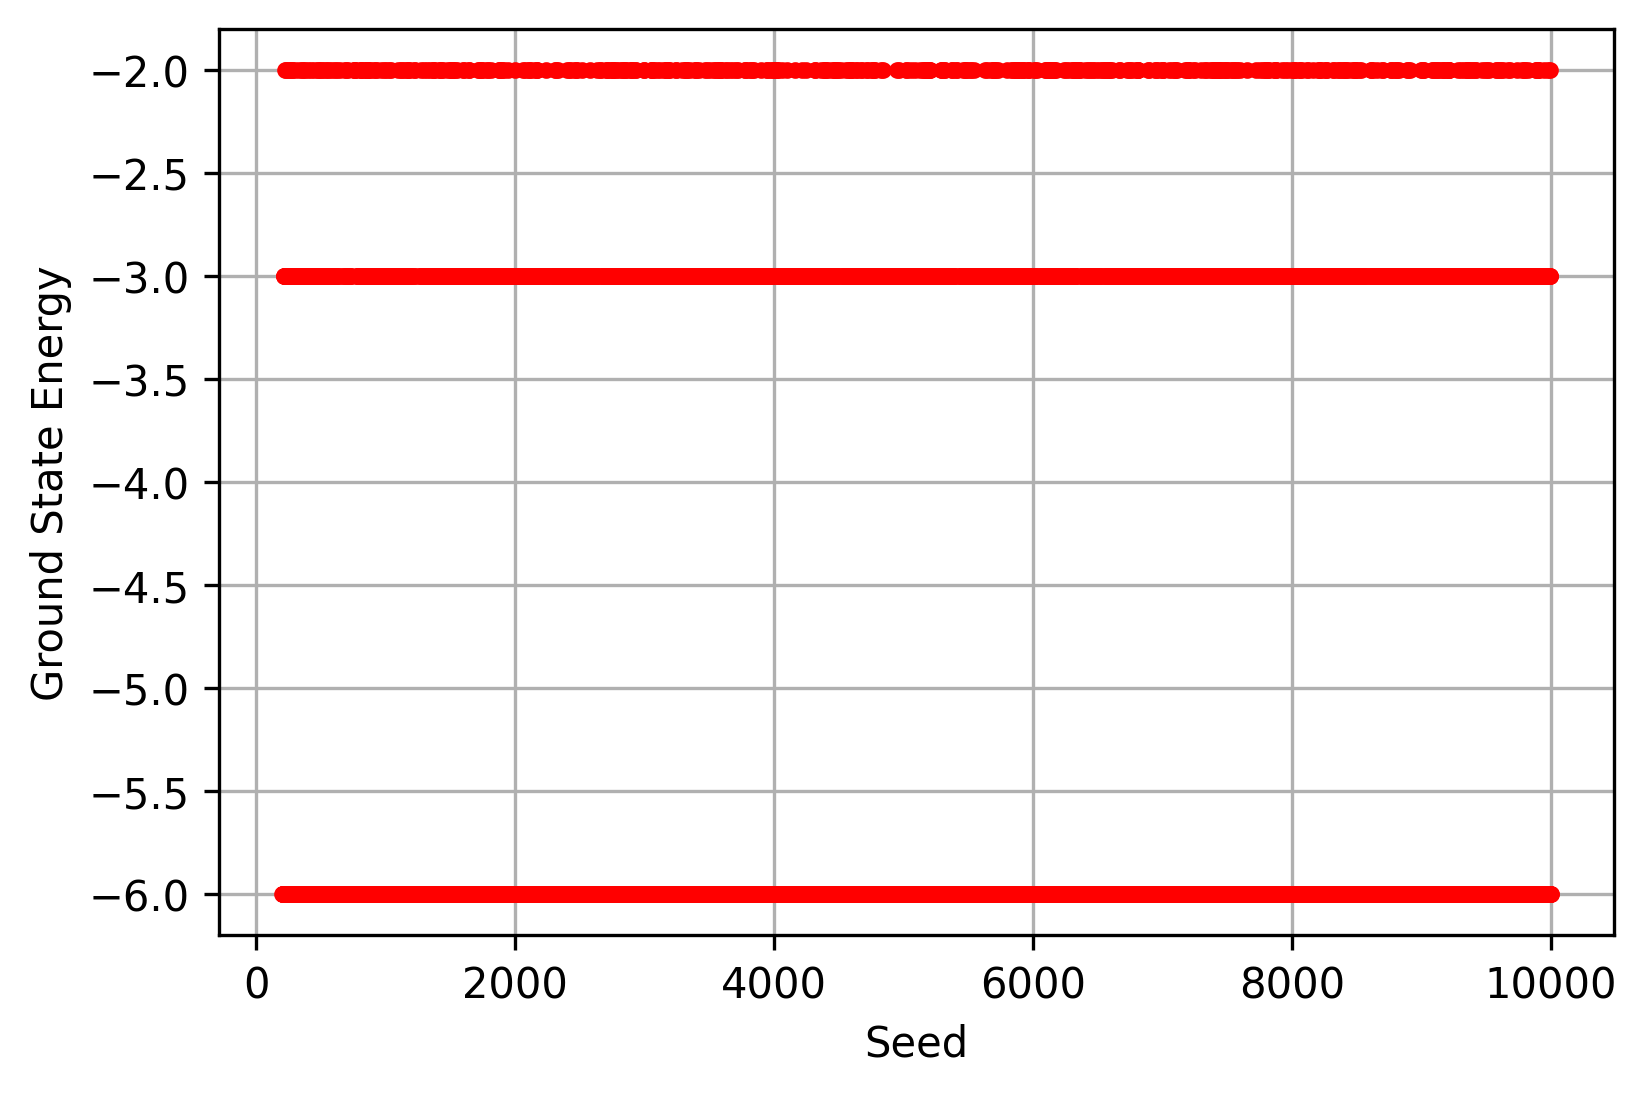

In [6]:
# seeds v.s. energy
plt.figure(dpi = 300)
plt.plot(seeds, Energy, 'r.')
plt.xlabel('Seed')
plt.ylabel('Ground State Energy')
plt.grid()
plt.show()

In [7]:
Energy

[-5.999999886929865,
 -5.999999811261418,
 -5.999999629396307,
 -5.999999893334278,
 -5.999999846920685,
 -5.999999795351259,
 -5.999999834996674,
 -5.999999944948027,
 -5.999999560479464,
 -2.999999074074937,
 -5.999999933942838,
 -2.999999889089778,
 -5.999999641863631,
 -5.999999881794142,
 -5.999999867981856,
 -2.999999728145181,
 -5.999999760131434,
 -5.999999841246109,
 -2.999999845275888,
 -1.999999607592316,
 -2.999999826071453,
 -2.999999936153772,
 -5.999999817215844,
 -5.999999834324562,
 -5.999999746244048,
 -1.999999946086862,
 -2.999999915057874,
 -5.999999617830483,
 -2.999999617355206,
 -5.999999870605846,
 -5.999999962618936,
 -5.999999756847525,
 -5.999999657039443,
 -5.999999927557513,
 -5.999999937191037,
 -2.999999826207548,
 -2.999999749956665,
 -5.999999459878669,
 -5.999999878006544,
 -5.99999997158944,
 -1.999999907076674,
 -2.999999983700341,
 -5.999999792130335,
 -5.999999786695748,
 -2.999999998722941,
 -5.999999824588288,
 -5.999999803508843,
 -5.9999999197

In [8]:
e = np.array(Energy)
two = np.where(e >= -2)
ratio2 = len(two[0]) / len(e)
ratio2 * 100

5.061224489795919

In [9]:
three = np.where(e >= -3)
ratio3 = (len(three[0]) - len(two[0]))/len(e)
ratio3 * 100

20.1734693877551

In [10]:
(1 - ratio3 - ratio2) * 100

74.76530612244898